In [159]:
# Importing required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import math
import re
import nltk
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, plot_confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [160]:
# Updating the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ukarj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [161]:
# Reading the spam sms dataset from csv
data = pd.read_csv('spam.csv',encoding='latin-1')

In [162]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [163]:
# renaming columns
data = data.rename(columns={'v1':'label','v2':'text'})

In [164]:
data.isnull().sum()

label            0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [165]:
data[['Unnamed: 2','Unnamed: 3', 'Unnamed: 4']].describe()

,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,50,12,6
unique,43,10,5
top,"bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,3,2,2


In [166]:
# Removing the columns that are not required
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [167]:
# Renaming the labels in label column with ham as 0 and spam as 1
data['label_n'] = data['label'].map({'ham':0,'spam':1})

In [168]:
# Adding a column as length of the text column
data['length'] = data['text'].apply(len)

In [169]:
data

,label,text,label_n,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


In [170]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [171]:
# There are 747 spam sms and 4825 ham sms
print('The percentage of spam sms is {:.2f}'.format(data.label.value_counts().spam*100/data.shape[0]))

The percentage of spam sms is 13.41


c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

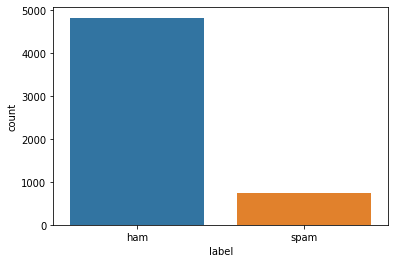

In [172]:
sns.countplot(data['label'])

In [173]:
data.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [174]:
# The average length of sms is 80
# The minimum length of sms is 2 and maximum is 910
# the standard deviation of length of sms is 59.69

In [175]:
data.groupby('label').mean()

,label_n,length
label,,
ham,0.0,71.023627
spam,1.0,138.866131


In [176]:
# The average length of ham sms is 71
# The average length of spam sms is 138.86

In [177]:
# Changing text case to lower
data['text'] = data['text'].apply(lambda x: x.lower())

In [178]:
# removing stopwords & punctuations

In [179]:
def rem_pun(text):
    new = ''.join([i for i in text if i not in string.punctuation])
    return new

In [180]:
data['text'] = data['text'].apply(lambda x: rem_pun(x))

In [181]:
stop_words = set(stopwords.words('english'))
data['text'] = data['text'].apply(lambda x: ' '.join(i for i in x.split() if i not in stop_words))

In [182]:
data.head()

,label,text,label_n,length
0,ham,go jurong point crazy available bugis n great ...,0,111
1,ham,ok lar joking wif u oni,0,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1,155
3,ham,u dun say early hor u c already say,0,49
4,ham,nah dont think goes usf lives around though,0,61


In [183]:
from collections import Counter

In [184]:
word_counter = Counter([word for text in data['text'] for word in text.split()])

In [185]:
word_counter.most_common(20)

[('u', 1119),
 ('call', 576),
 ('2', 478),
 ('im', 462),
 ('get', 386),
 ('ur', 384),
 ('4', 287),
 ('dont', 279),
 ('go', 278),
 ('ok', 277),
 ('ltgt', 276),
 ('free', 275),
 ('know', 257),
 ('like', 242),
 ('got', 238),
 ('ill', 237),
 ('good', 234),
 ('come', 226),
 ('time', 208),
 ('day', 202)]

In [186]:
most_common_words = pd.DataFrame(word_counter.most_common(20),columns=['word','count'])

In [187]:
most_common_words

,word,count
0,u,1119
1,call,576
2,2,478
3,im,462
4,get,386
5,ur,384
6,4,287
7,dont,279
8,go,278
9,ok,277


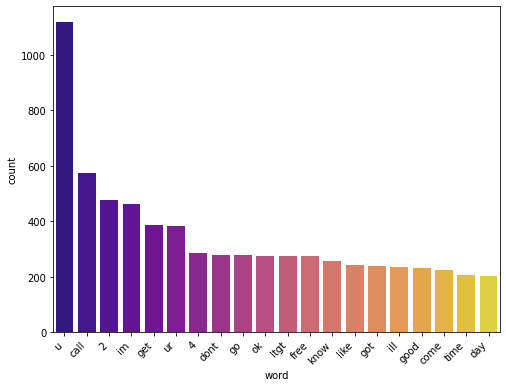

In [188]:
plt.figure(figsize=(8,6))
sns.barplot(data=most_common_words,x='word',y='count',palette='plasma')
plt.xticks(rotation=45,ha='right')
plt.show()

In [189]:
# The most common used word is u

In [190]:
data

,label,text,label_n,length
0,ham,go jurong point crazy available bugis n great ...,0,111
1,ham,ok lar joking wif u oni,0,29
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1,155
3,ham,u dun say early hor u c already say,0,49
4,ham,nah dont think goes usf lives around though,0,61
...,...,...,...,...
5567,spam,2nd time tried 2 contact u u å£750 pound prize...,1,161
5568,ham,ì b going esplanade fr home,0,37
5569,ham,pity mood soany suggestions,0,57
5570,ham,guy bitching acted like id interested buying s...,0,125


In [191]:
# Seperating the data between feature and target as X and Y respectively

X = data['text']
Y = data['label_n']

In [192]:
# Using Tfid vectorizer
tfid_v = TfidfVectorizer()
X_vectored = tfid_v.fit_transform(X)

In [193]:
# Splitting the data between training and testing data
x_train, x_test, y_train, y_test = train_test_split(X_vectored,Y,test_size=0.2,random_state=7)

- ## Model using naive_bayes MultinomialNB

In [194]:
model_nv = MultinomialNB()

In [197]:
model_nv.fit(x_train,y_train)

MultinomialNB()

In [198]:
y_pred = model_nv.predict(x_test)

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score of MultinomialNB is  0.9632286995515695


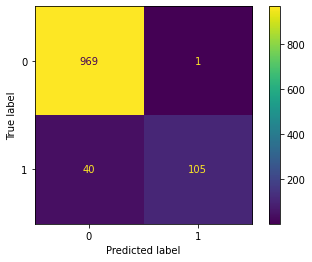

In [199]:
plot_confusion_matrix(model_nv,x_test,y_test)
print('Accuracy score of MultinomialNB is ',accuracy_score(y_test,y_pred))

- ## Model using naive_bayes SVC

In [200]:
model_svc = SVC()

In [202]:
model_svc.fit(x_train,y_train)

SVC()

In [203]:
y_pred_svm = model_svc.predict(x_test)

c:\users\ukarj\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Accuracy score of SVC is  0.9704035874439462


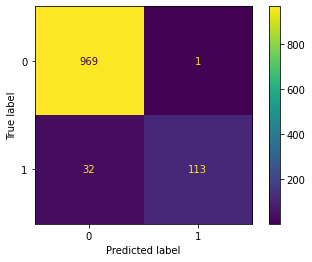

In [204]:
plot_confusion_matrix(model_svc,x_test,y_test)
print('Accuracy score of SVC is ',accuracy_score(y_test,y_pred_svm))